<a href="https://colab.research.google.com/github/soubhikhalder2005-sys/house-price-project/blob/main/05_data_cleaning_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

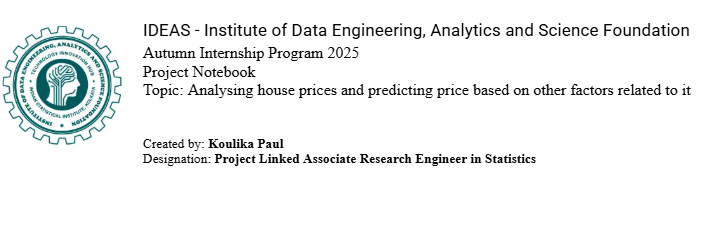

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [340]:
house_data= pd.read_csv('/content/house_price_india.csv')
house_data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


***Insert synthetic missing value***

In [341]:
house_data_missing= house_data.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762810e+09,42491.0,5.0,2.5,3650.0,9050.0,2.0,0.0,4.0,5.0,...,1921.0,0.0,122003.0,52.8645,-114.557,2880.0,5400.0,2.0,58.0,NaN
1,6.762811e+09,42491.0,NaN,2.5,2920.0,4000.0,1.5,0.0,NaN,5.0,...,1909.0,NaN,122004.0,NaN,-114.470,2470.0,4000.0,2.0,51.0,1400000.0
2,NaN,42491.0,5.0,NaN,2910.0,9480.0,NaN,NaN,NaN,3.0,...,1939.0,NaN,NaN,52.8852,NaN,2940.0,6600.0,1.0,53.0,1200000.0
3,6.762813e+09,42491.0,4.0,2.5,3310.0,42998.0,2.0,NaN,0.0,3.0,...,2001.0,0.0,122005.0,52.9532,-114.321,3350.0,42847.0,NaN,76.0,838000.0
4,6.762813e+09,NaN,3.0,2.0,2710.0,4500.0,1.5,NaN,0.0,4.0,...,NaN,0.0,122006.0,52.9047,-114.485,2060.0,NaN,NaN,51.0,805000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,NaN,42734.0,2.0,1.5,1556.0,20000.0,NaN,NaN,0.0,4.0,...,1957.0,0.0,122066.0,NaN,-114.472,2250.0,17286.0,NaN,76.0,221700.0
14616,6.762830e+09,42734.0,3.0,2.0,1680.0,NaN,1.5,0.0,0.0,NaN,...,NaN,0.0,122072.0,NaN,-114.393,1540.0,7480.0,3.0,59.0,219200.0
14617,6.762831e+09,42734.0,2.0,1.0,1070.0,NaN,1.0,0.0,0.0,3.0,...,1962.0,0.0,122056.0,52.7289,-114.507,1130.0,6120.0,2.0,64.0,209000.0
14618,6.762831e+09,42734.0,4.0,1.0,1030.0,6621.0,1.0,NaN,0.0,4.0,...,NaN,0.0,122042.0,52.7157,NaN,1420.0,6631.0,3.0,NaN,205000.0


**Q1. Try inserting a missing value to a specific column of your choice**

In [342]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/house_price_india.csv')

# Insert a missing value (np.nan) into the 'price' column at row index 10
df.loc[10, 'price'] = np.nan

# Print the info to confirm the missing value was inserted
df.info()

# Print the head (first few rows) of the DataFrame to see the change
df.head(15)   # showing more rows to include index 10




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,NaN
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,NaN
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,NaN
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,NaN
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,NaN
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,NaN
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,0,122008,52.7637,-114.050,3320,11241,3,72,785000,NaN
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,0,122006,52.9254,-114.482,1570,10578,3,71,750000,NaN
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,0,122009,52.8014,-114.598,2010,6550,1,73,750000,NaN
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,0,122010,52.9145,-114.391,2320,10814,2,53,698000,NaN


***Information about the data***

In [343]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     11696 non-null  float64
 1   Date                                   11696 non-null  float64
 2   number of bedrooms                     11696 non-null  float64
 3   number of bathrooms                    11696 non-null  float64
 4   living area                            11696 non-null  float64
 5   lot area                               11696 non-null  float64
 6   number of floors                       11696 non-null  float64
 7   waterfront present                     11696 non-null  float64
 8   number of views                        11696 non-null  float64
 9   condition of the house                 11696 non-null  float64
 10  grade of the house                     11696 non-null  float64
 11  Ar

***Dropping columns***

In [344]:
## Date column wrong input in the data so we drop it and keep inside the actual data
house_data_missing.drop(['Date','Longitude','Renovation Year','Postal Code', 'Lattitude','living_area_renov', 'lot_area_renov'],axis=1,inplace=True)

In [345]:
house_data_missing.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Number of schools nearby', 'Distance from the airport',
       'Price'],
      dtype='object')

**Q2. Show statistics about the data of only numeric columns**

In [346]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/house_price_india.csv')

# Show statistics
numeric_stats = df.describe()

# Print the statistics
print(numeric_stats)


                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791962e+04          0.540239            0.087193 

***Distribution of price in the dataset***

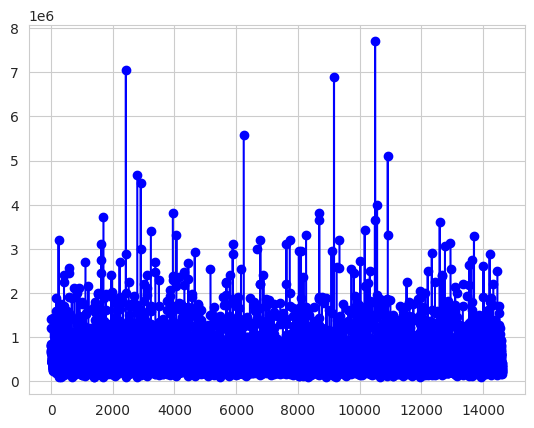

In [347]:
plt.plot(house_data_missing.index,house_data_missing['Price'],marker='o',linestyle='-',color='b', label="Distribution of Price for all houses")
plt.show()

**Q3. Find the distribution of area (total area) of houses (use Seaborn distplot)**

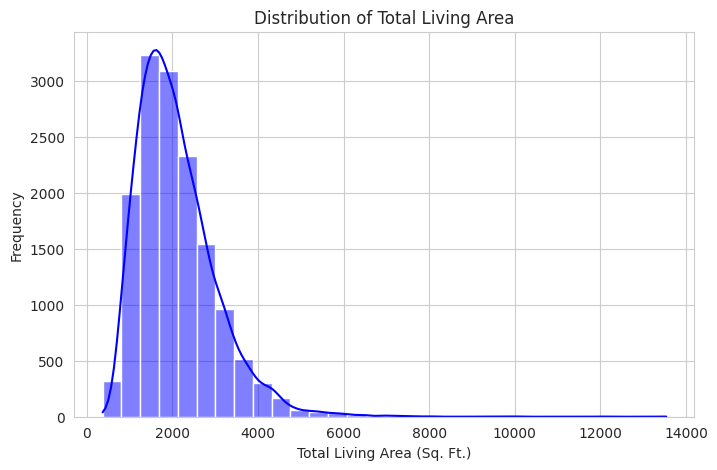

In [348]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/house_price_india.csv')
df.columns = df.columns.str.replace(' ', '_')

# Create total living area column
df['living_area_total'] = df['Area_of_the_house(excluding_basement)'] + df['Area_of_the_basement']

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df['living_area_total'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Living Area')
plt.xlabel('Total Living Area (Sq. Ft.)')
plt.ylabel('Frequency')
plt.show()



***Checking for duplicate rows***

In [349]:
house_data_missing.duplicated().sum()

np.int64(0)

***Checking missing values***

In [350]:
house_data_missing.isna().sum()

,0
id,2924
number of bedrooms,2924
number of bathrooms,2924
living area,2924
lot area,2924
number of floors,2924
waterfront present,2924
number of views,2924
condition of the house,2924
grade of the house,2924


***Handling missing values***

***Technique 1: Remove missing value rows***

In [351]:
house_data_missing1= house_data_missing.dropna()
house_data_missing1.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


***Technique 2: Replace with mean***

In [352]:
house_data_missing2= house_data_missing.copy()
for cols in house_data_missing2.columns:
  house_data_missing2[cols]= house_data_missing2[cols].fillna(np.mean(house_data_missing2[cols]))
house_data_missing2.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q4. Try replacing the missing values with the standard deviation of each column**

In [353]:

import pandas as pd
import numpy as np

df = pd.read_csv("house_price_india.csv")

np.random.seed(42)
df_q1 = df.copy()
indices = np.random.choice(df_q1.index, size=100, replace=False)
df_q1.loc[indices, "number of bathrooms"] = np.nan

df_q4 = df_q1.copy()
for col in df_q4.select_dtypes(include=[np.number]).columns:
    std_val = df_q4[col].std()
    df_q4[col].fillna(std_val, inplace=True)

# Check if missing values remain
print("Missing values after replacement:", df_q4.isna().sum().sum())

# Preview the modified column
df_q4[["number of bathrooms"]].head(10)




Missing values after replacement: 0


,number of bathrooms
0,2.50
1,2.50
2,2.75
3,2.50
4,2.00
5,2.50
6,3.25
7,1.75
8,2.50
9,2.25


***Technique 3: Interpolation***

In [354]:

house_data_missing3= house_data_missing.interpolate(method='linear')
house_data_missing2.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q5. Try replacing the missing values using interpolation with the polynomial method**

In [355]:

import pandas as pd
import numpy as np

df = pd.read_csv("house_price_india.csv")

np.random.seed(42)
df_q1 = df.copy()
indices = np.random.choice(df_q1.index, size=100, replace=False)
df_q1.loc[indices, "number of bathrooms"] = np.nan

df_q5 = df_q1.copy()
df_q5.interpolate(method='polynomial', order=2, inplace=True)

print("Missing values after interpolation:\n", df_q5.isna().sum().sum())

df_q5[["number of bathrooms"]].head(10)


Missing values after interpolation:
 0


,number of bathrooms
0,2.50
1,2.50
2,2.75
3,2.50
4,2.00
5,2.50
6,3.25
7,1.75
8,2.50
9,2.25


***Technique 4: KNN imputation***

In [356]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q6. Perform replacing missing values with KNN imputers on scaled data. Also, inverse the scaled data to get the original data.**


In [357]:

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

# Inverse transform to original scale
imputed_data = scaler.inverse_transform(imputed_scaled)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_cols)

print("Imputation completed. Sample data:")
print(imputed_df.head())


Imputation completed. Sample data:
             id     Date  number of bedrooms  number of bathrooms  \
0  6.762810e+09  42491.0                 5.0                 2.50   
1  6.762811e+09  42491.0                 4.0                 2.50   
2  6.762811e+09  42491.0                 5.0                 2.75   
3  6.762813e+09  42491.0                 4.0                 2.50   
4  6.762813e+09  42491.0                 3.0                 2.00   

   living area  lot area  number of floors  waterfront present  \
0       3650.0    9050.0               2.0                 0.0   
1       2920.0    4000.0               1.5                 0.0   
2       2910.0    9480.0               1.5                 0.0   
3       3310.0   42998.0               2.0                 0.0   
4       2710.0    4500.0               1.5                 0.0   

   number of views  condition of the house  ...  Built Year  Renovation Year  \
0              4.0                     5.0  ...      1921.0              

***Changing datatype***

In [358]:
imputed_df['Number of schools nearby'] = imputed_df['Number of schools nearby'].astype(int)


***Find the number of houses having 3 schools nearby***

In [359]:
imputed_df.groupby('Number of schools nearby')['id'].count()

,id
Number of schools nearby,
1,4794
2,4853
3,4973


**Q7. Interpret the above result**

In [360]:
# Q7: Short interpretation of the KNN Imputer result

q7_answer = """
Q7: Interpretation

missing values were filled using KNN Imputer (k=5) after scaling.
This means each missing value (e.g., bathrooms) was replaced by the average
of its 5 most similar houses based on features like area and price.

Result: No missing values remain, and the imputations are more realistic
than simple mean/median or interpolation, since they reflect actual
patterns in the housing data.
"""

print(q7_answer)



Q7: Interpretation

missing values were filled using KNN Imputer (k=5) after scaling. 
This means each missing value (e.g., bathrooms) was replaced by the average 
of its 5 most similar houses based on features like area and price.

Result: No missing values remain, and the imputations are more realistic 
than simple mean/median or interpolation, since they reflect actual 
patterns in the housing data.



***Correlation between all the features***

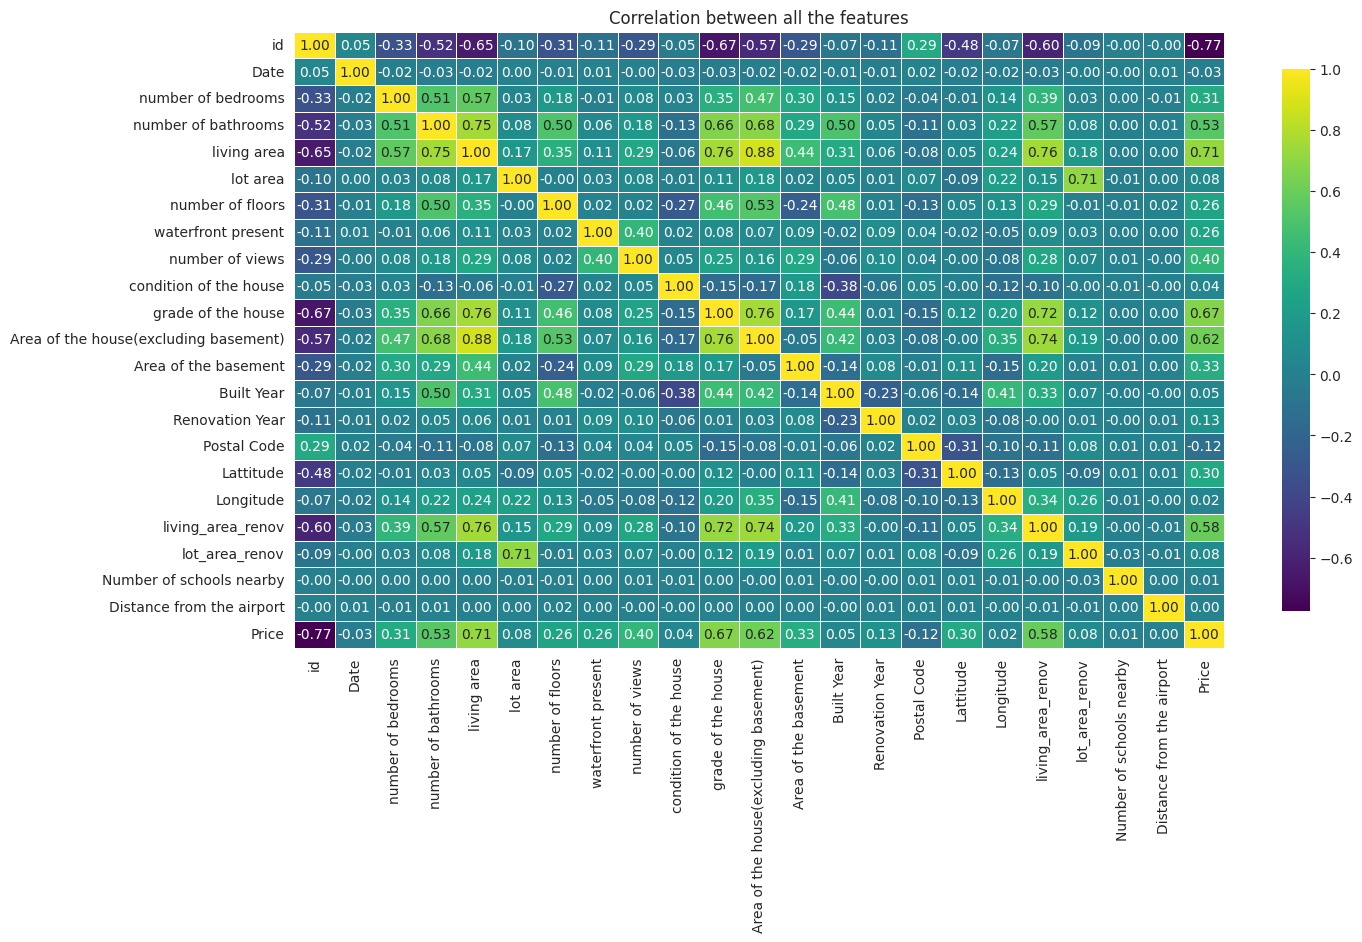

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(imputed_df.corr(),
            annot=True,
            fmt='.2f',
            cmap='viridis',
            linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.title("Correlation between all the features")
plt.show()


**Q8. Find features that are highly correlated with the area of the house (excluding the basement)**

In [362]:

import pandas as pd

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Correlation matrix
corr = df.corr(numeric_only=True)

# Sort correlations with target feature
target_corr = corr["Area of the house(excluding basement)"].sort_values(ascending=False)

print("Top correlated features with 'Area of the house (excluding basement)':\n")
print(target_corr.head(10))


Top correlated features with 'Area of the house (excluding basement)':

Area of the house(excluding basement)    1.000000
living area                              0.875793
grade of the house                       0.758222
living_area_renov                        0.737744
number of bathrooms                      0.684391
Price                                    0.615220
number of floors                         0.525643
number of bedrooms                       0.473599
Built Year                               0.419369
Longitude                                0.345899
Name: Area of the house(excluding basement), dtype: float64


***Find the distribution of each feature***

['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']


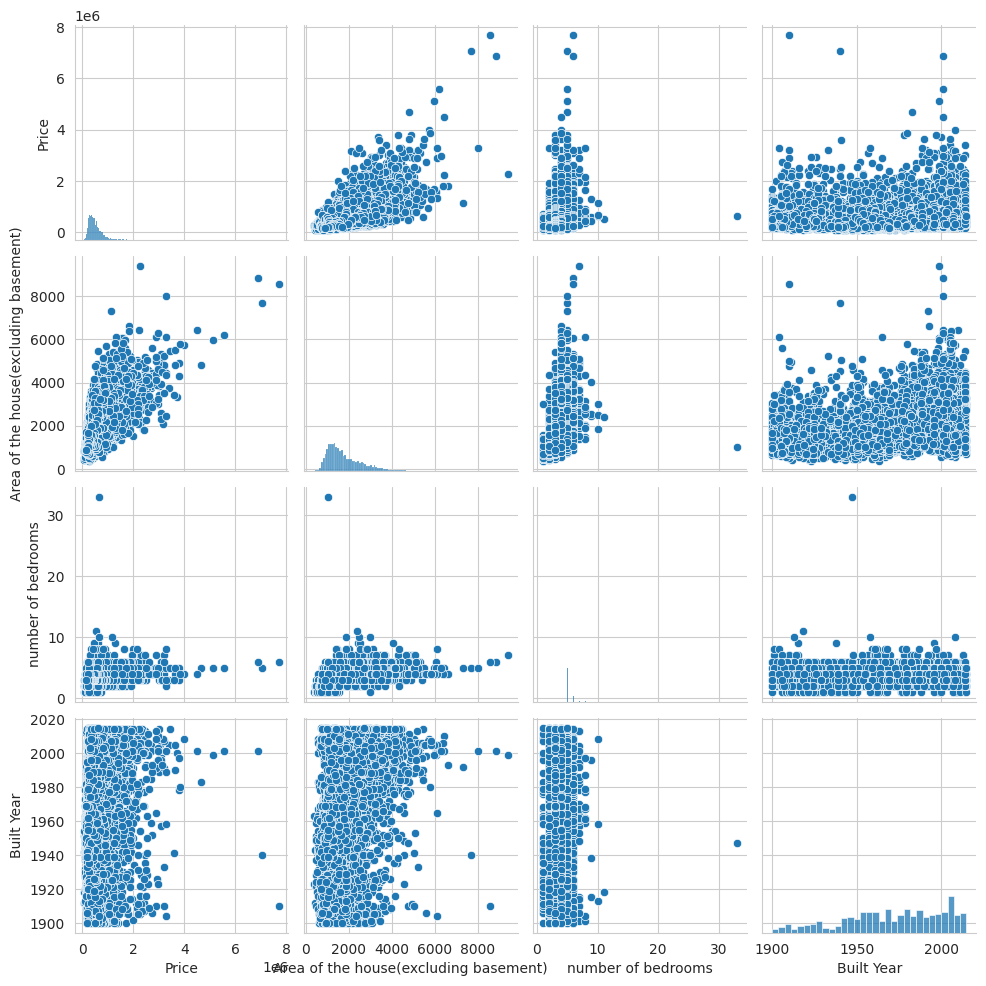

In [363]:

print(imputed_df.columns.tolist())
sns.pairplot(imputed_df[[
    "Price",
    "Area of the house(excluding basement)",
    "number of bedrooms",
    "Built Year"
]])
plt.show()


**Q9. Find the average price of houses having 3 schools nearby**

In [364]:

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Average price where Number of schools nearby = 3
avg_price = np.mean(df[df["Number of schools nearby"] == 3]["Price"])

print("Average price of houses with 3 schools nearby:", avg_price)


Average price of houses with 3 schools nearby: 545635.951337221


**Q10. Find the average area of houses having 5 bedrooms**

In [365]:

import pandas as pd

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Check column names to ensure correct spelling
print("Available columns:", df.columns)

# Calculate average area for houses with 5 bedrooms
avg_area = df[df["number of bedrooms"] == 5]["Area of the house(excluding basement)"].mean()

print("Average area of houses with 5 bedrooms:", avg_area)



Available columns: Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')
Average area of houses with 5 bedrooms: 2422.993512511585


***Selecting the features for predicting***

In [366]:
features = []
for col in imputed_df.iloc[:, :-1].columns:
    if imputed_df['Price'].corr(imputed_df[col]) > 0.50:
        features.append(col)

print(features)

# Define X and y
X = imputed_df[features]
y = imputed_df.iloc[:, -1]


['number of bathrooms', 'living area', 'grade of the house', 'Area of the house(excluding basement)', 'living_area_renov']


In [367]:
X = imputed_df[features]
y = imputed_df.iloc[:, -1]

**Q11. Show the pairwise distribution of X and y**

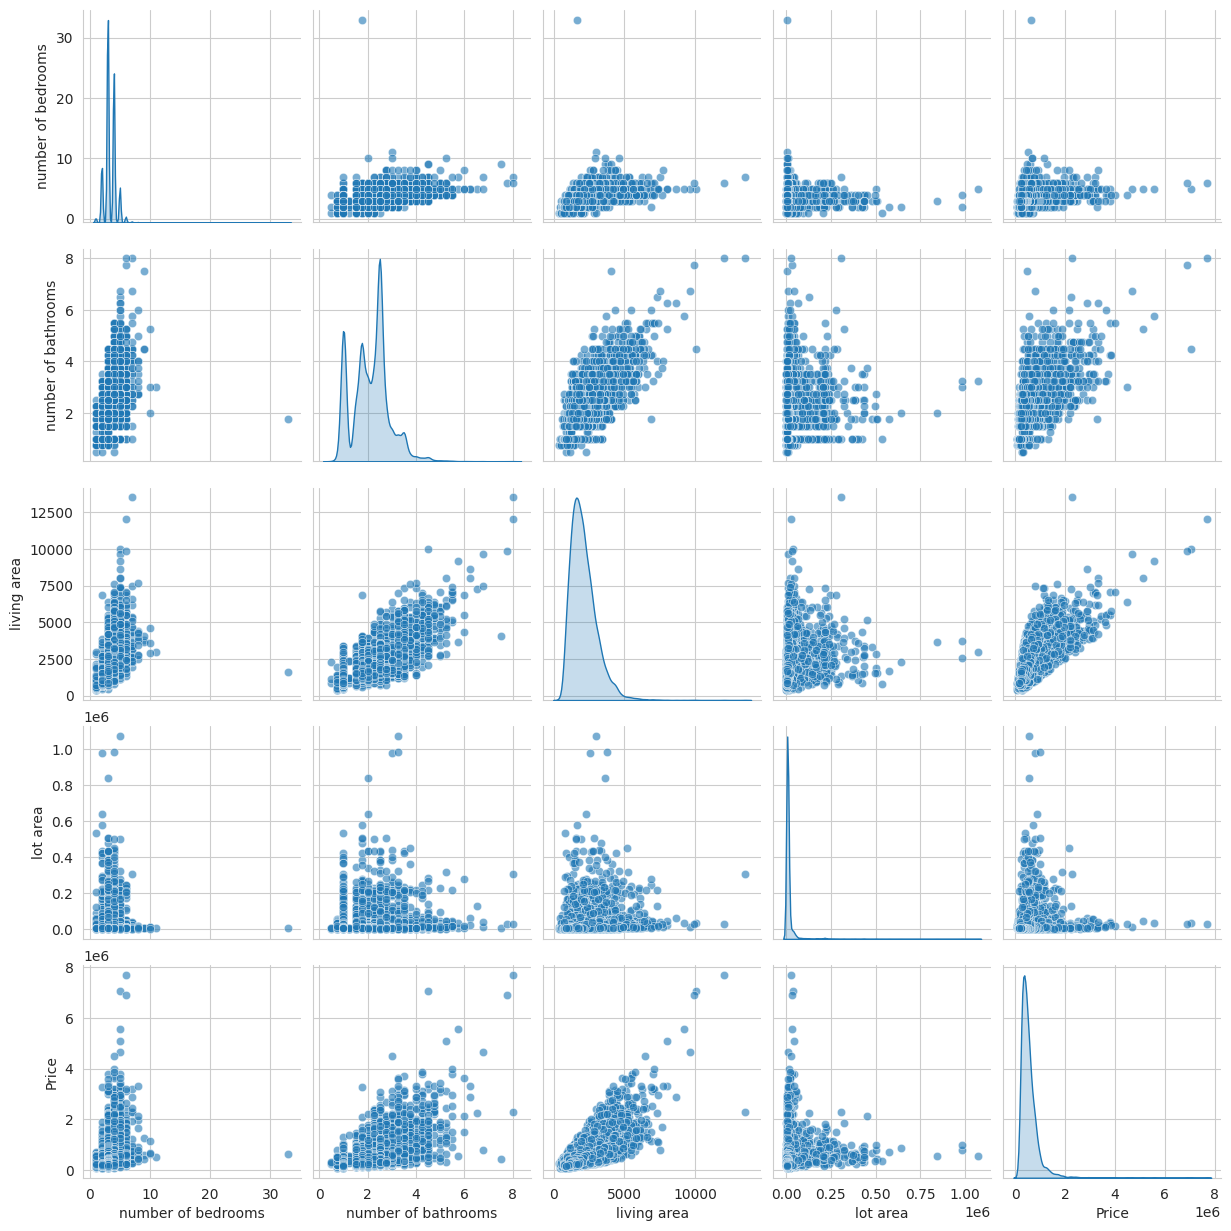

In [368]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Select features (X) for prediction and target (y)
X = df[["number of bedrooms", "number of bathrooms", "living area", "lot area"]]
y = df["Price"]

# Combine into one DataFrame for visualization
data_xy = X.copy()
data_xy["Price"] = y

# Pairwise distribution
sns.pairplot(data_xy, diag_kind="kde", plot_kws={"alpha":0.6})
plt.show()


***Splitting datasets into training and testing***

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123)

**Q12. Split the data as 60% training and 40% testing**

In [371]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("house_price_india.csv")

# Select features (X) and target (y)
X = df[["number of bedrooms", "number of bathrooms", "living area", "lot area"]]
y = df["Price"]

# Train-test split (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 8772
Testing set size: 5848


***Fitting the linear regression model and predicting***

In [372]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [373]:
LR= LinearRegression()
LR_model= LR.fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

***Evaluation***

In [374]:
MSE= mean_squared_error(y_test,y_pred)
R_square= r2_score(y_test,y_pred)

In [375]:
print(MSE)
print("==============")
print(R_square)

63883803419.33221
0.5180684810022442


**Q13. Try model building and predicting with some other dataset of your choice**

In [376]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


MSE: 0.56
R² Score: 0.58
